In [1]:
import pickle
import pandas as pd
import partial_dependence as pdp_plot
import numpy as np


In [2]:
root_sentiero = "example_data"
df_test = pd.read_csv(root_sentiero+"/test.csv")

ground_truth_column = "label"
features = [x for x in list(df_test.columns) if x not in [ground_truth_column]]

df_test = df_test[features]

name = "rf"
fileobj = open( root_sentiero+"/"+name+".pkl", "rb" )

pickle_model = pickle.load( fileobj )

chosen_feature = "alcohol"
ch_num_samples = 100
ch_clust_number = 10
ch_scale = np.array(pickle_model["scale"])
ch_shift = np.array(pickle_model["shift"])
model = pickle_model["model"]
labels_name = ["good\nwine","bad\nwine"]
labels_focus = labels_name[0]

In [3]:
# initialization
wine_pdp_plot = pdp_plot.PartialDependence(df_test,
                  model,
                  labels_name,
                  labels_focus,
                  ch_num_samples,
                  ch_scale,
                  ch_shift)


In [4]:
# for each instance in test set,
# creating a different versions for each different value from the feature samples
the_matrix = wine_pdp_plot.pdp(chosen_feature)


In [5]:
# computing predictions for each of those different versions of vectors
preds = wine_pdp_plot.pred_comp_all(the_matrix)



In [6]:
# computing the clustering using the distances among the different prediction curves
labels_clust = wine_pdp_plot.compute_clusters(preds,ch_clust_number)


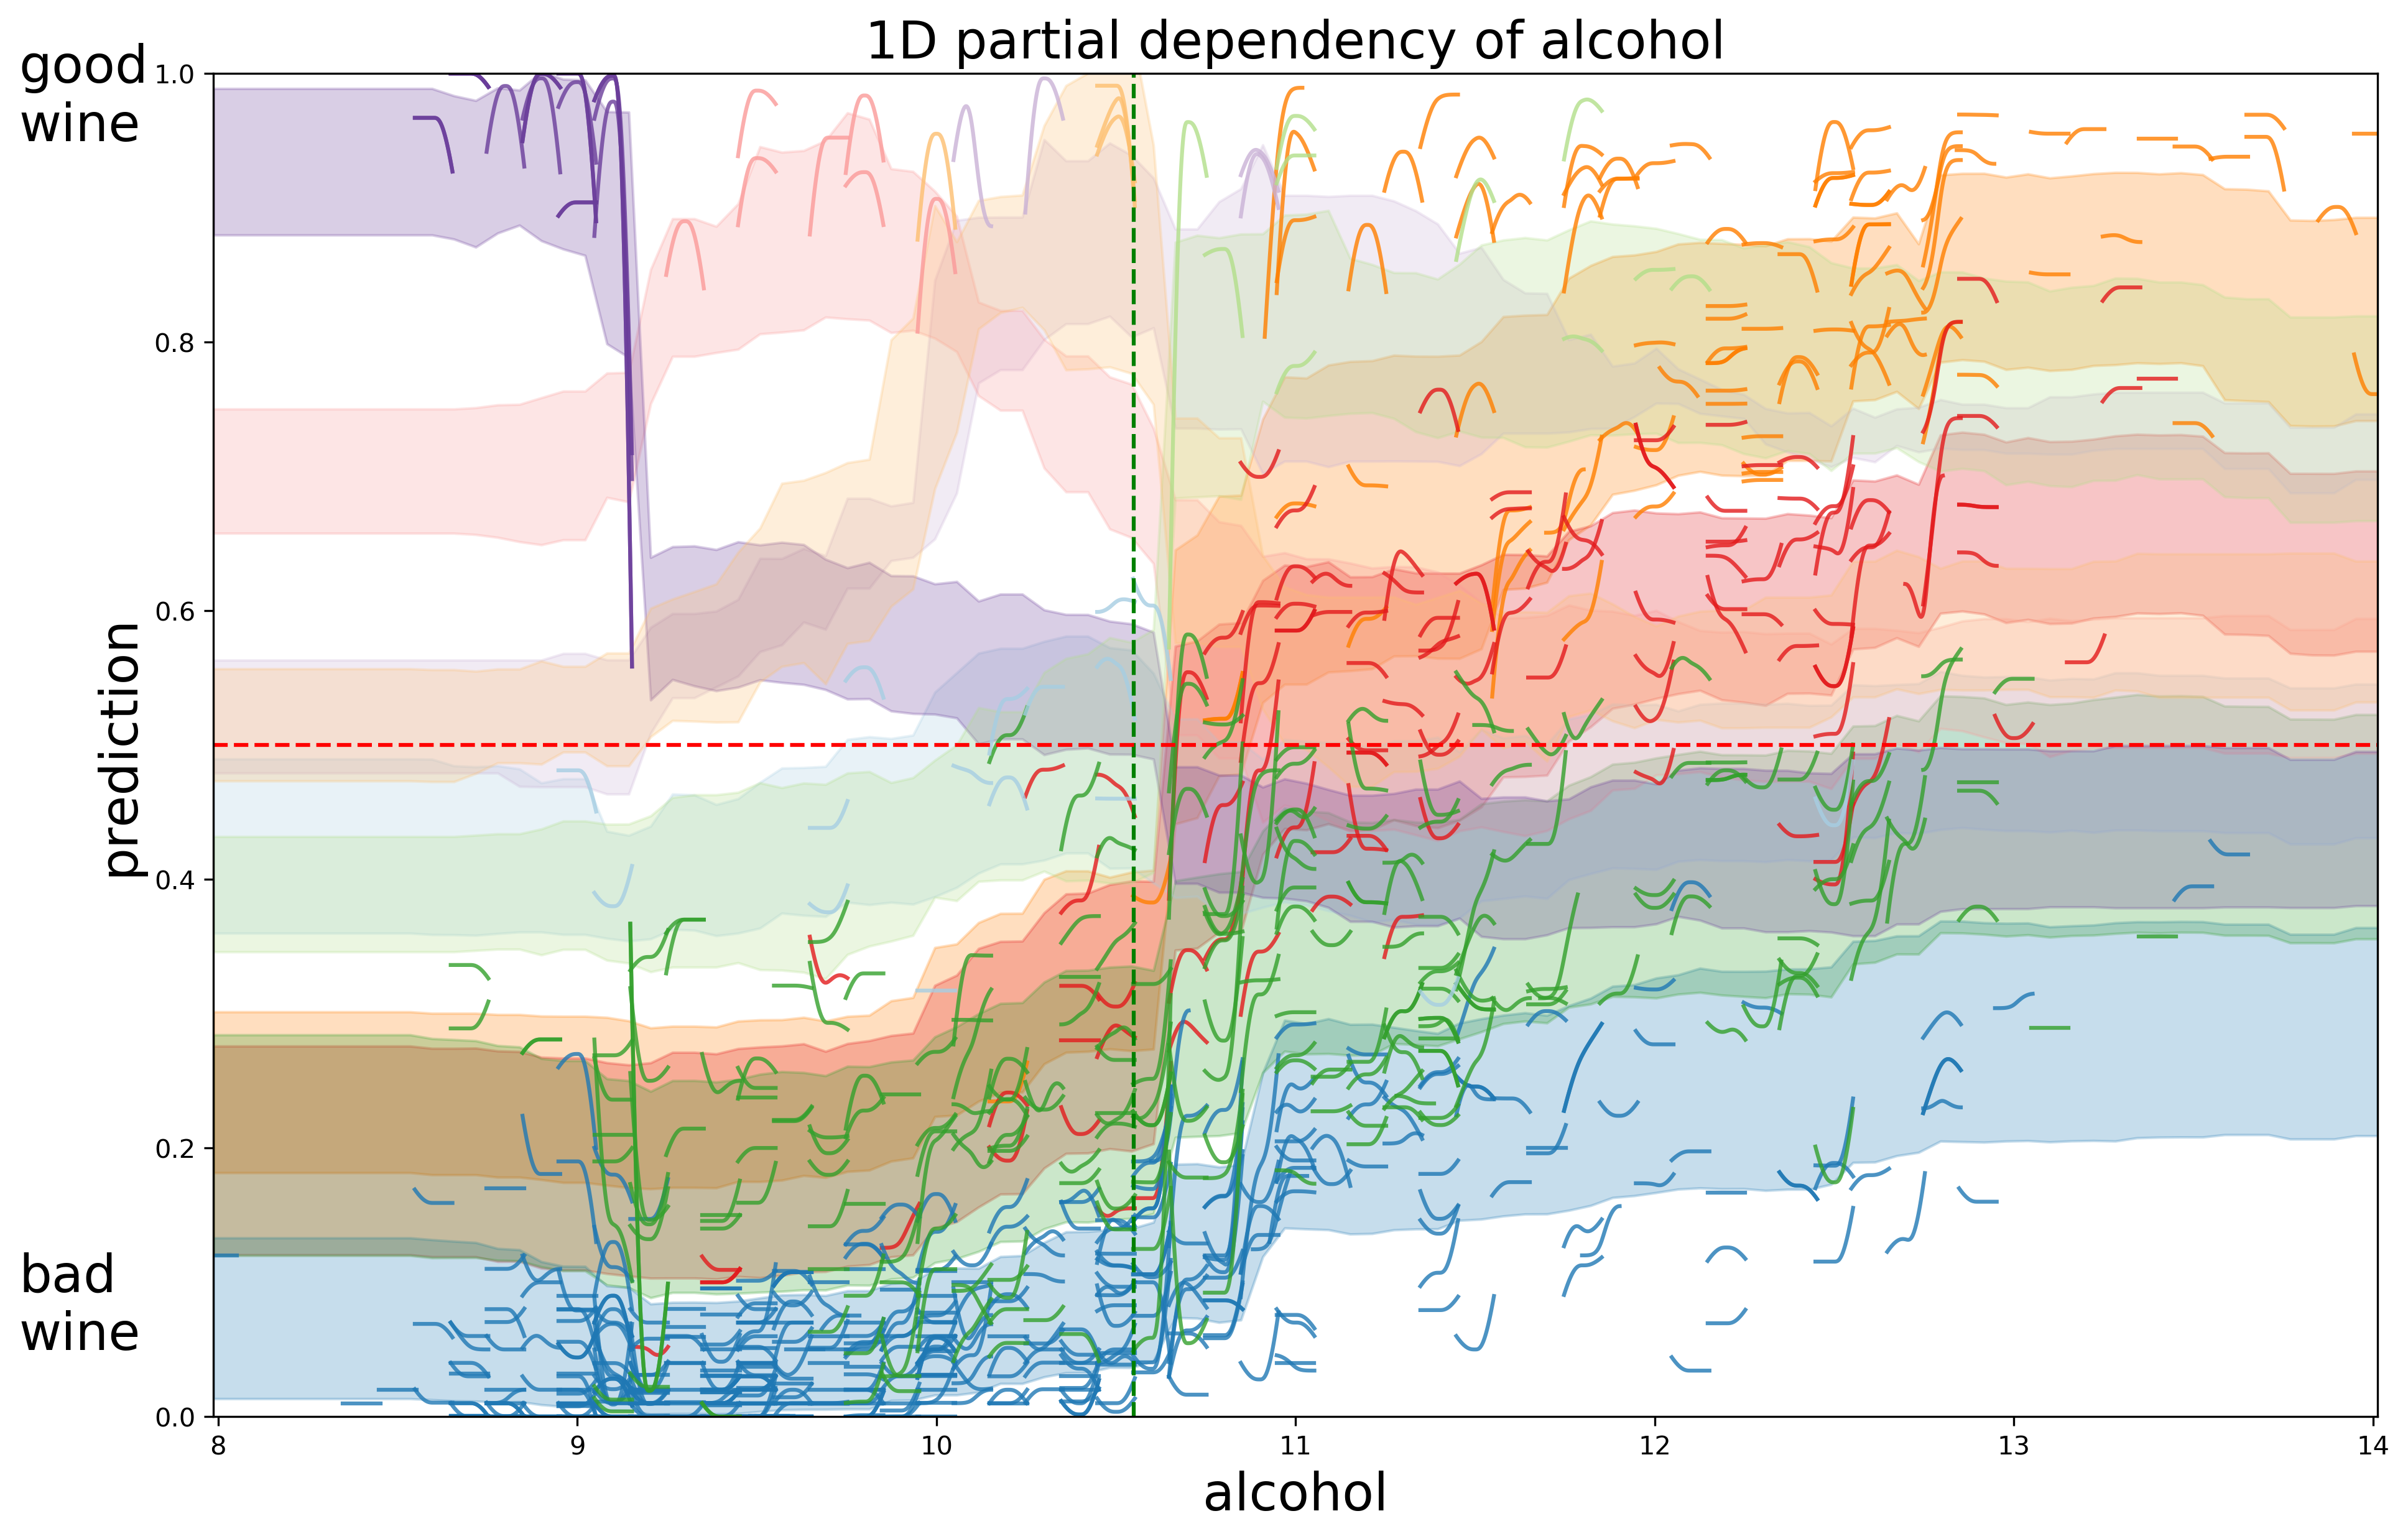

In [7]:
# plotting all we got
wine_pdp_plot.plot(preds,labels_clust)

             


In [8]:
#using all possible default arguments
# if scale and shift are default = None 
# then we have to provide directly the normalized data 

df_test_matrix = (df_test.as_matrix() + ch_shift)*ch_scale
normalized_df = pd.DataFrame(df_test_matrix)
normalized_df.columns = df_test.columns

# this time we will use the DTW (LB Keogh) distance instead of the simple RMSE
lb_k = True

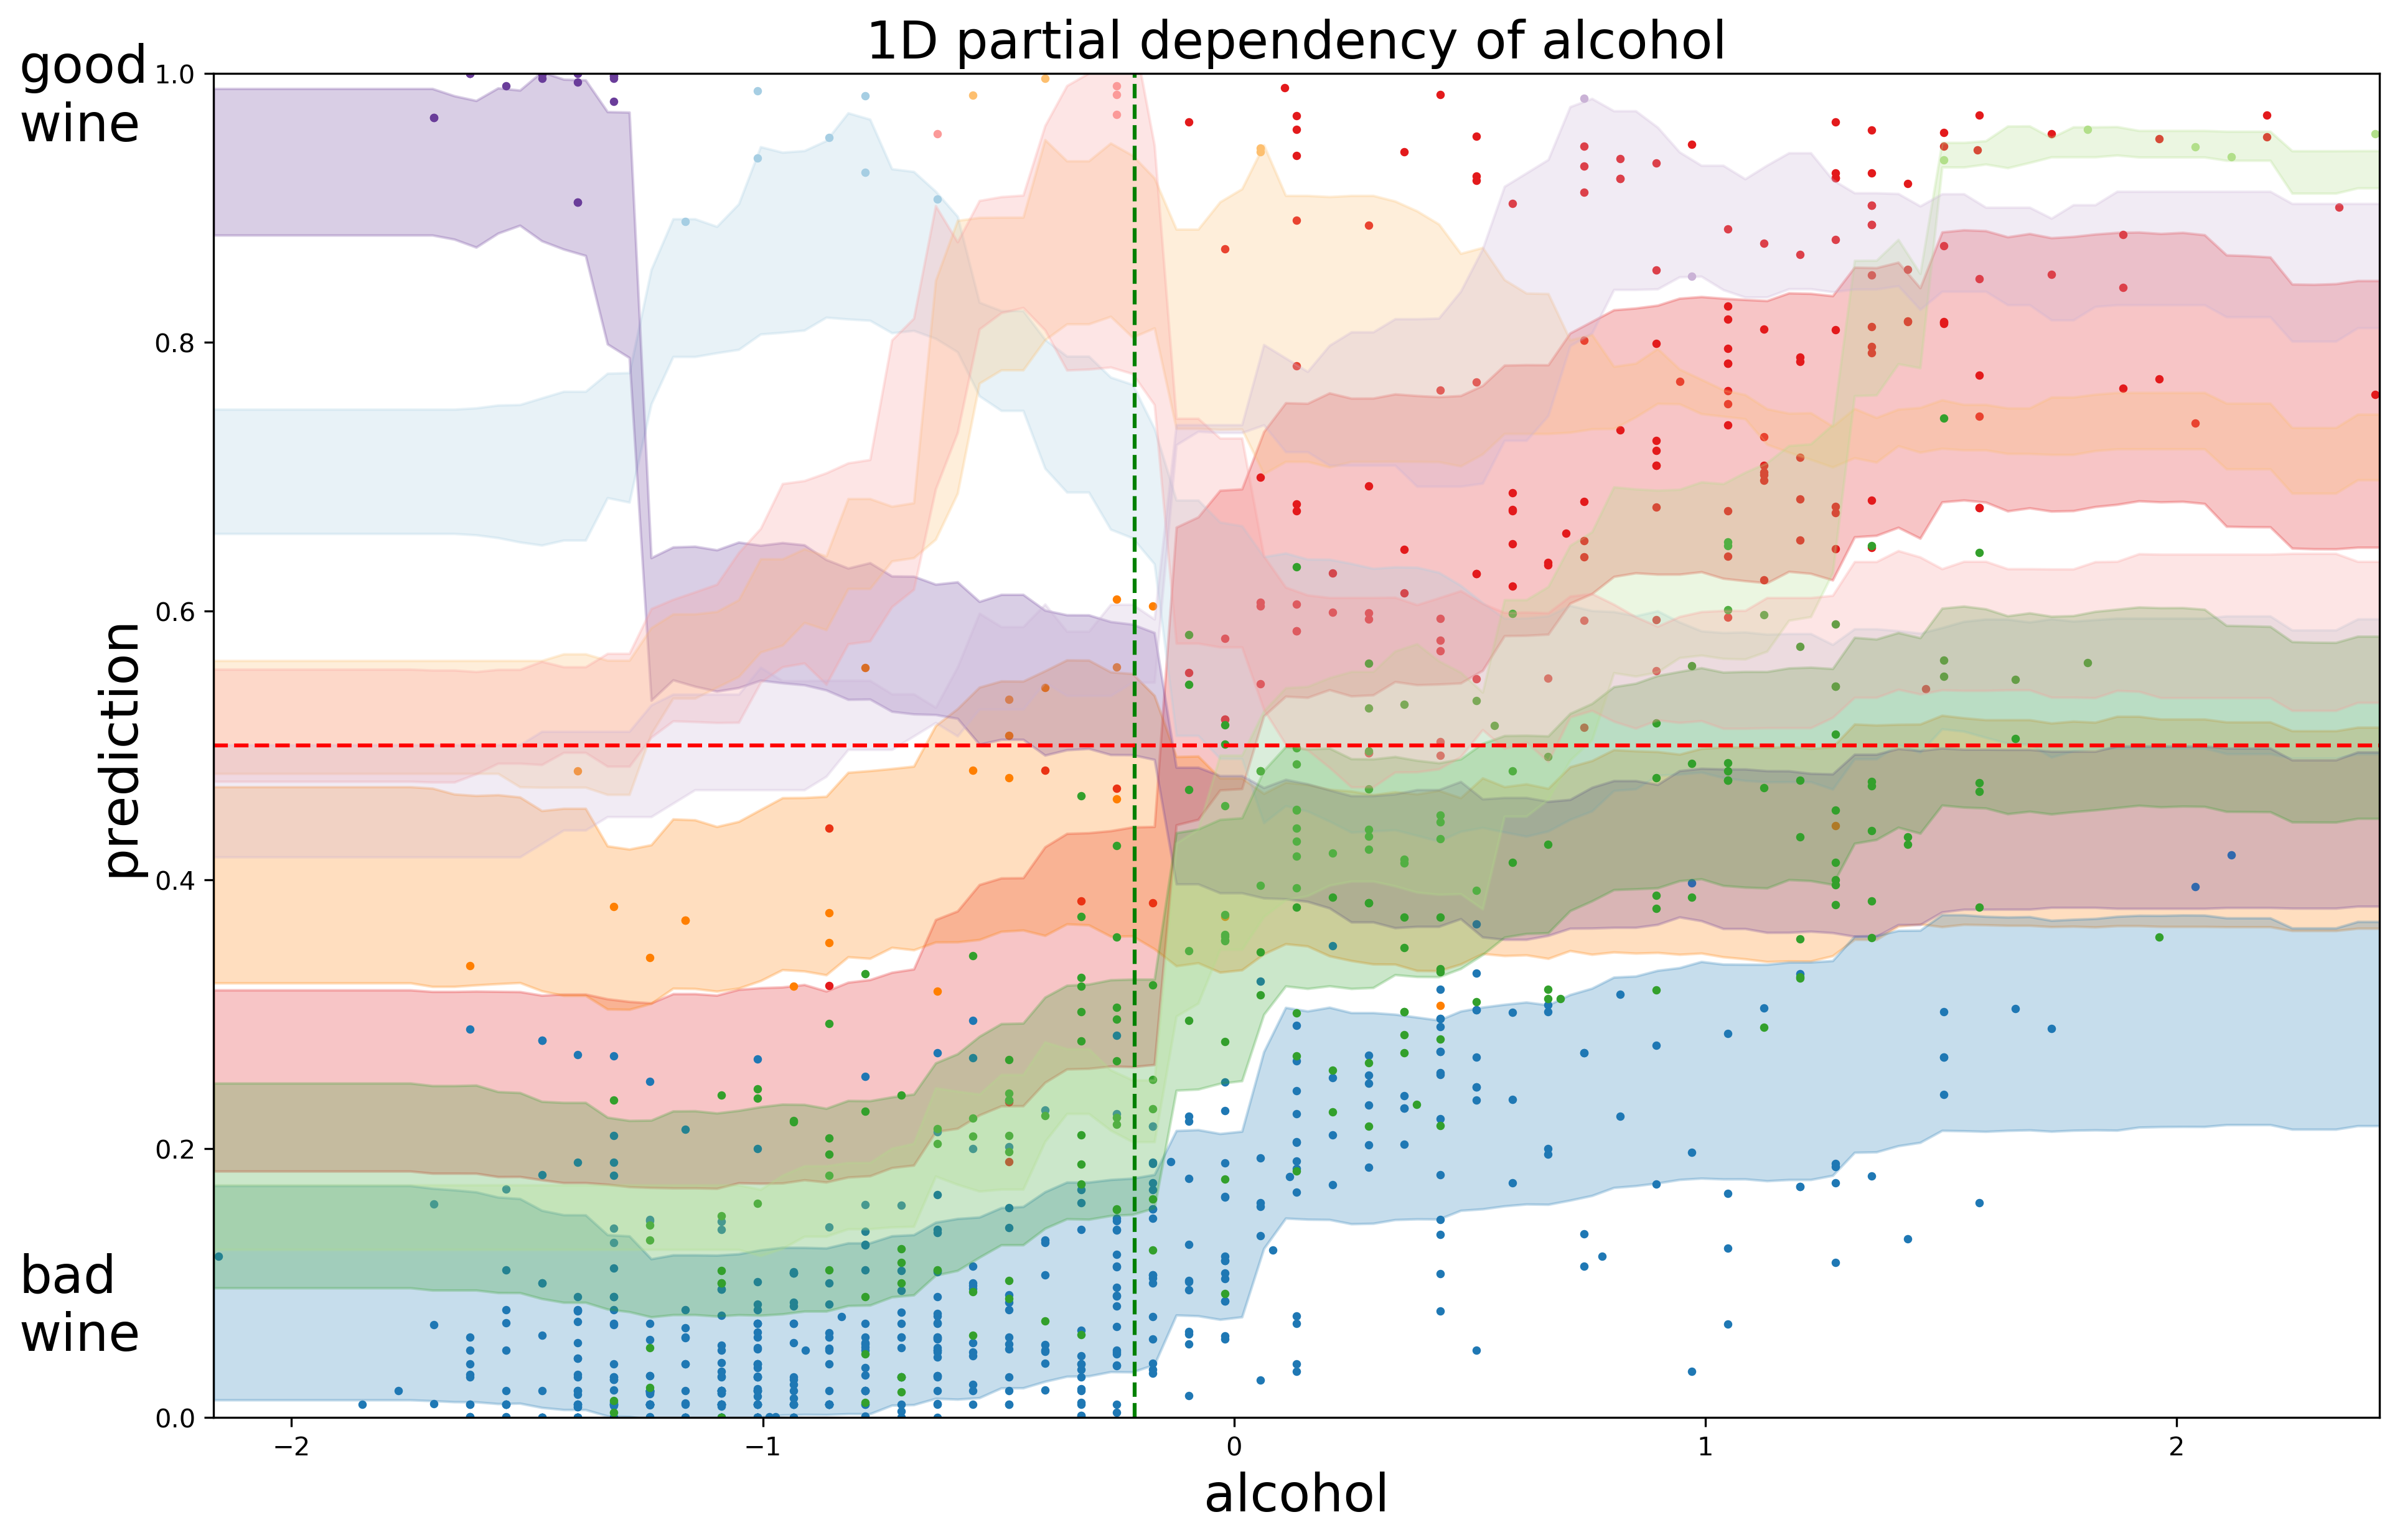

In [9]:
# initialization
wine_pdp_plot = pdp_plot.PartialDependence(normalized_df,
                                      model,
                                      labels_name,
                                      labels_focus)


# for each instance in test set,
# creating a different versions for each different value from the feature samples
the_matrix = wine_pdp_plot.pdp(chosen_feature)


# computing predictions for each of those different versions of vectors
preds = wine_pdp_plot.pred_comp_all(the_matrix)



# computing the clustering using the distances among the different prediction curves using DTW
labels_clust = wine_pdp_plot.compute_clusters(preds,ch_clust_number,lb_keogh_bool=lb_k)


# plotting the data points instead of the edges for each wine: 
#each dot is: (original normalized alcohol, original prediction)
wine_pdp_plot.plot(preds,labels_clust,local_curves = False)

             


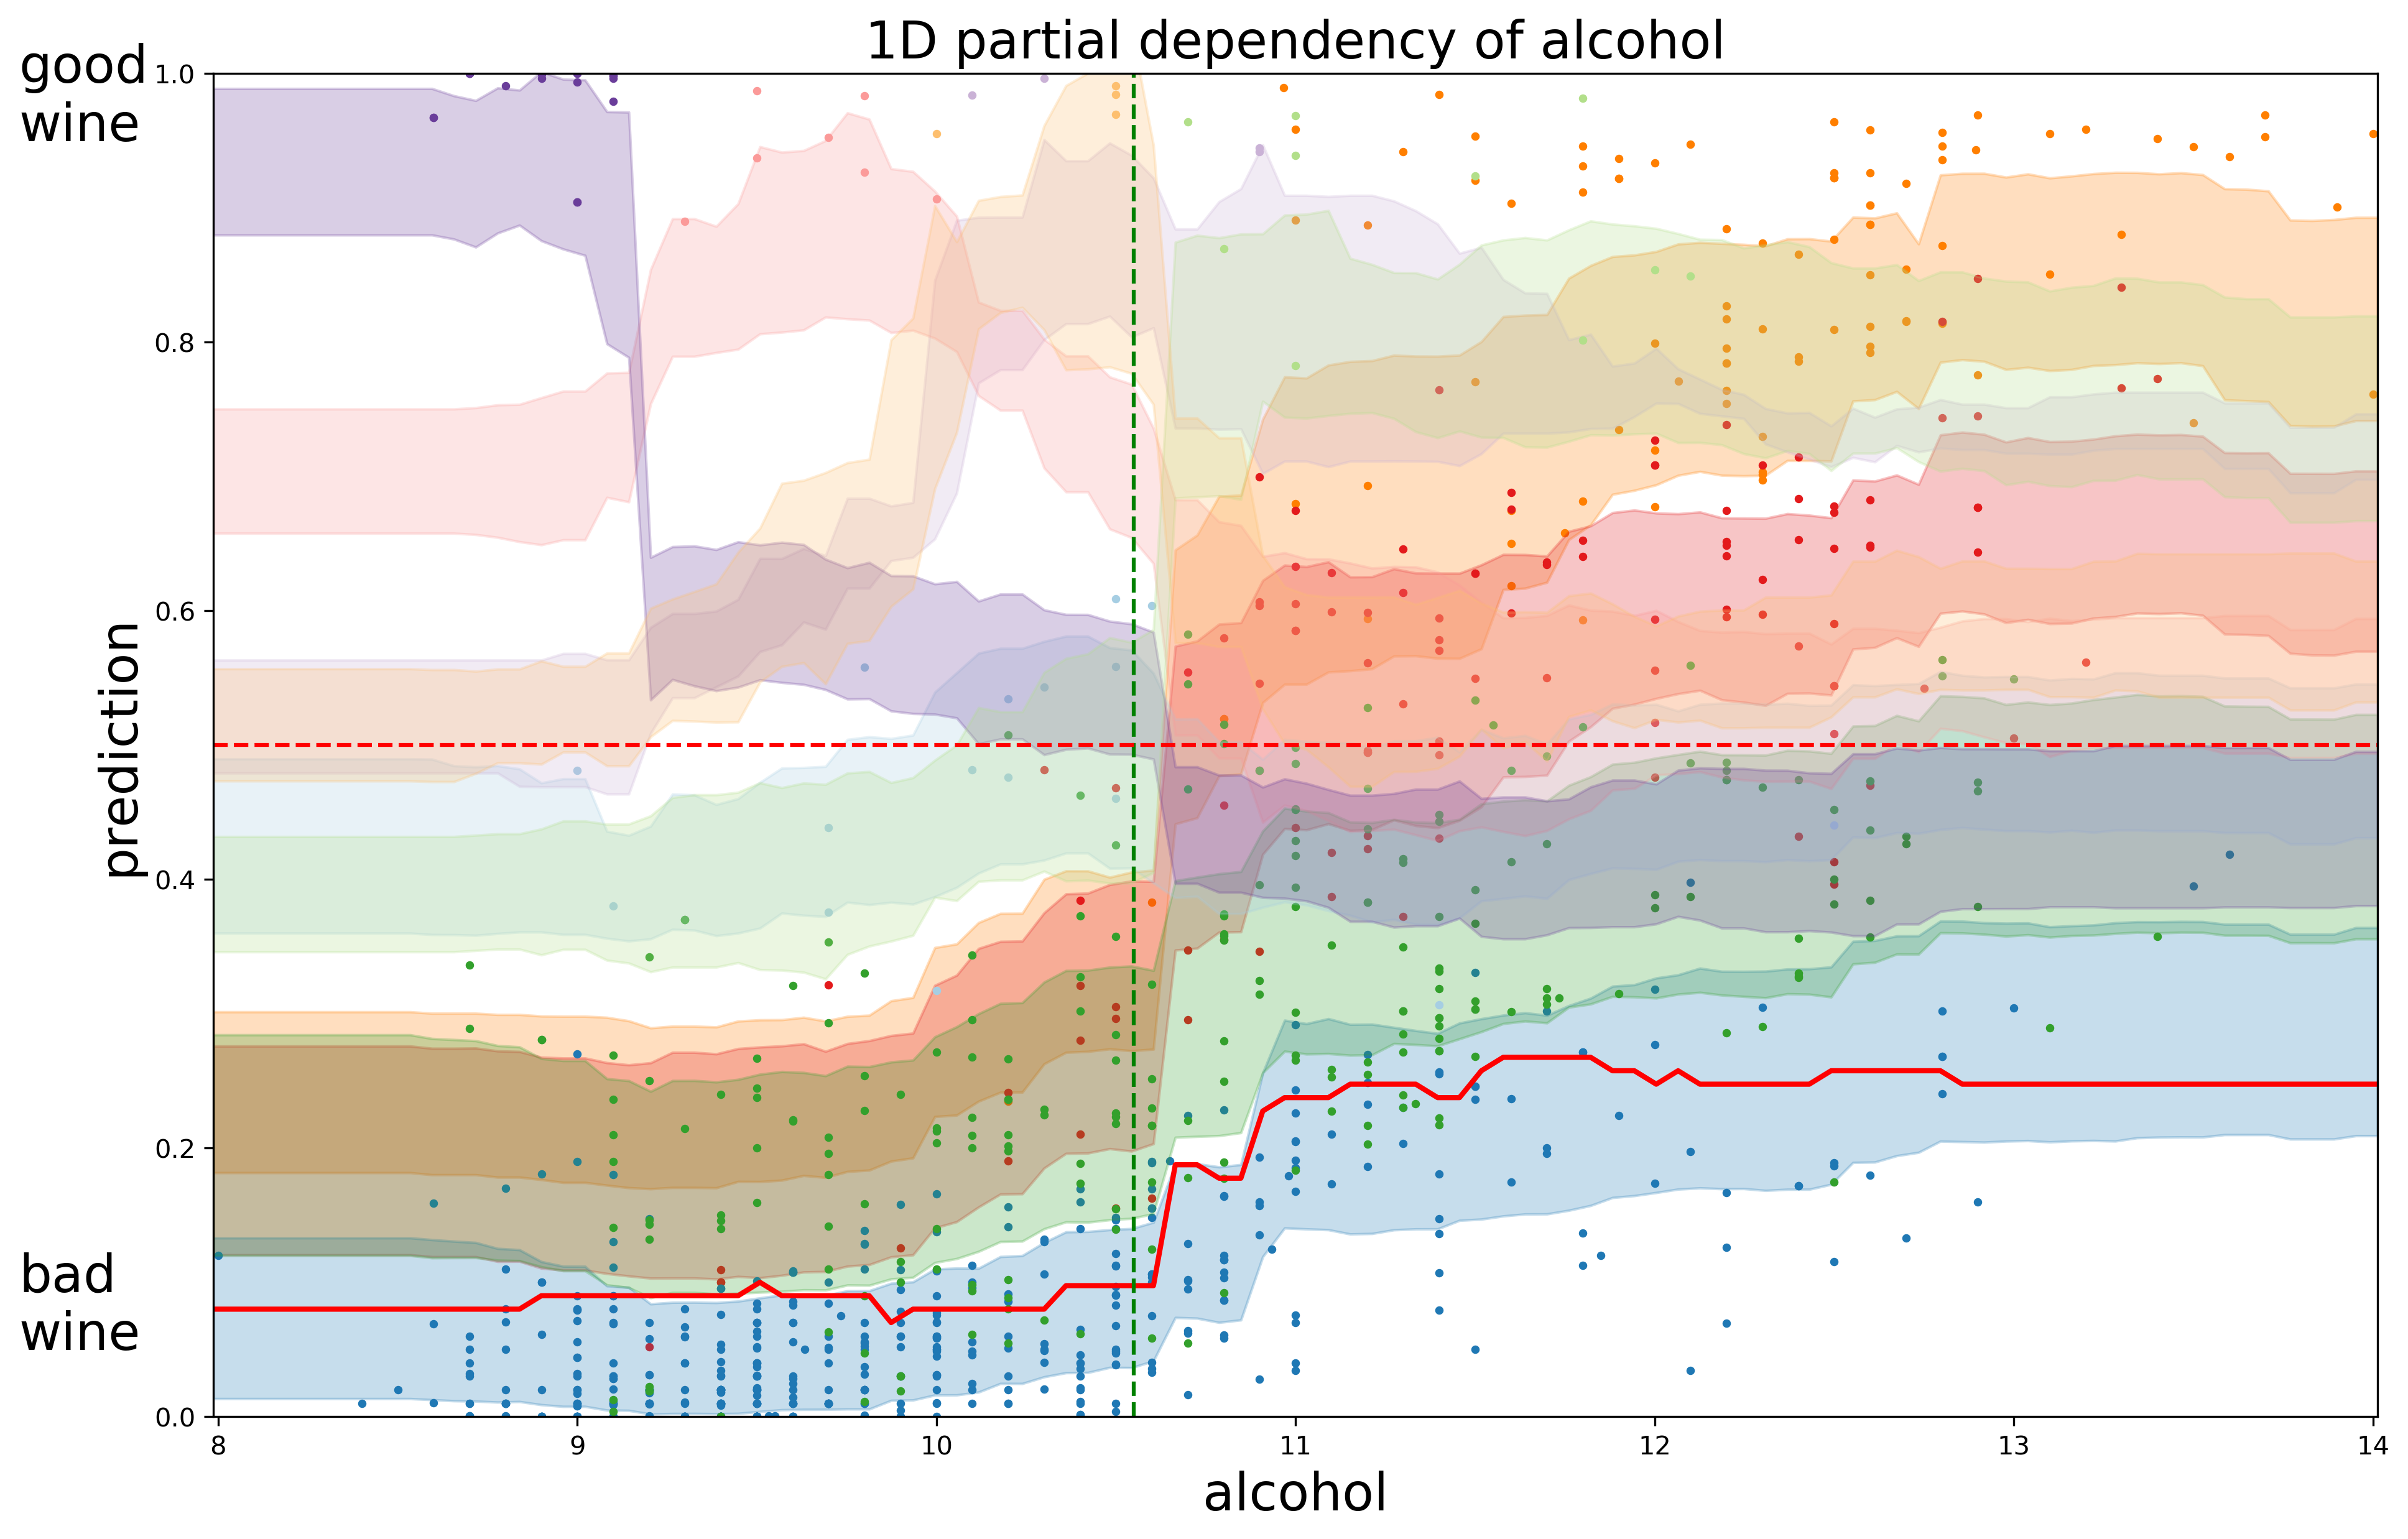

In [10]:
# initialization
wine_pdp_plot = pdp_plot.PartialDependence(df_test,
                  model,
                  labels_name,
                  labels_focus,
                  ch_num_samples,
                  ch_scale,
                  ch_shift)

# creating a custom_vectors with all features equal to mean values 
# highlighing its partial dependence in red in the visualization
custom_vect = np.zeros(len(df_test.columns))
i = 0
for fix in df_test.columns:
    custom_vect[i] = np.mean(df_test[fix])
    i+= 1
    
# for each instance in test set,
# creating a different versions for each different value from the feature samples
the_matrix, custom_vectors = wine_pdp_plot.pdp(chosen_feature,chosen_row=custom_vect)

# computing predictions for each of those different versions of vectors
preds,custom_preds = wine_pdp_plot.pred_comp_all(the_matrix,
                                                 chosen_row_alterations=custom_vectors)

# computing the clustering using the distances among the different prediction curves
labels_clust = wine_pdp_plot.compute_clusters(preds,ch_clust_number)

# plotting all we got
wine_pdp_plot.plot(preds,labels_clust,local_curves = False,
                   chosen_row_preds_to_plot=custom_preds)
